# FİZ219 - Bilgisayar Programlama I | 12/01/2020
# Final Ödevi

**Wheatstone Köprüsü**

**Son gönderim tarihi: 24 Ocak Pazar, 23:59**

Elektronik devreler laboratuvarında bize aşağıdaki gibi bir devre verilmiş olsun:

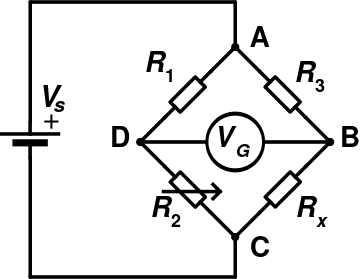

$R_2$ direnci [_reosta_](https://tr.wikipedia.org/wiki/Reosta) da denilen, değeri ayarlanabilir bir direnç. $R_1$ ve $R_3$ dirençlerini bir kutudan rastgele çekiyoruz, neyse ki onların dirençlerini üzerlerindeki renklere bakıp anlayabiliyoruz. Devremize uygulanan potansiyel farkı ($V_s$) da biliyoruz. $D$ ile $B$ noktalarının arasına bağlı olan bir [galvanometre](https://tr.wikipedia.org/wiki/Galvanometre) (esasen hassas akım ölçerdir; biz ise deneyimizde çok yüksek bir direnç monte edilmiş haliyle, doğrudan hassas potansiyel farkı ölçmekte kullanıyoruz) ile de o iki nokta arasındaki potansiyel farkı ($V_G$) ölçebiliyoruz. Durum böyleyken böyle yani.

Bizden istenen, kapalı bir kutu içerisinde verilen $R_x$ direncinin değerini $10^{-5}$ hassasiyetle saptamamız.



## Hesaplamalara başlamadan önce önemli not
Kodunuzda (`clear`, `clc`, vs. tarzı "sıfırlayıcı" komutlar kullanarak başlıyorsanız tabii ki onlardan sonra) ilk rastgele hesabı gerçekleştirmeden **evvel** (bir kereliğine) şu satırı yerleştirin:

`rand("seed",219)`

Bu komut sayesinde sizin kodunuzu bir başkası ("ben" 8) çalıştırdığında, sizin bulduğunuz rastgele değerlerin aynısı elde edilebilecektir.

## Kutudan $R_1$ ve $R_3$'ün rastgele çekimi
**Yapılacaklar #1:** `R1` ve `R3` değerlerine $[10,30]\,\Omega$ aralığından rastgele tam sayı değerler atayın (kafanızdan değil tabii, bilgisayara _atatın_ 8).

## Bilmediğimiz $R_x$
**Yapılacaklar #2:** Bulmaya çalıştığımız `Rx` değerine de yine 
aralığında rastgele bir sayı atatın (ama buna bakmayın).

## $R_2$ en son kaçta kaldıysa...
**Yapılacaklar #3:** Sizden önce reostayı kullananlar reostanın değerini $[0,50]\,\Omega$ aralığında bir değerde bırakmışlar, siz de bu `R2` değerini bu şekilde tanımlayın.

## $V_s$'yi de ayarlayalım
**Yapılacaklar #4:** Devreye uygulanan potansiyel fark olan $V_s$ değerini de 30 V'a ayarlayın.

## Önce Teori...
Devremizi, kabloları uzatıp/kısaltarak yeniden düzenlemek suretiyle elektriksel anlamda hiçbir şey değiştirmeden şu şekile getirebiliriz (unutmayın ki, aradaki galvanometre D ile B noktaları arasındaki potansiyel farkı ölçmek için kullandığımız bir alet, ideal durumda devreye bir etkisi olamaz):


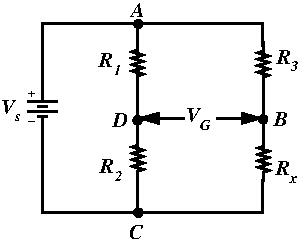  
Kaynak: [Wikipedia](https://en.wikipedia.org/wiki/Wheatstone_bridge)

**ADC** ile **ABC** kolları birbirine paralel olduklarından dolayı, $V_{ADC}=V_{ABC}$, onlar da $V_s$'ye eşit olur (üç kolun da uçları arasındaki potansiyel farkın aslında $V_{AC}$ oluşundan):

$$V_s=V_{AC}=V_{ADC}=V_{ABC}$$

**ADC** kolu üzerinden geçen akımı $I_1$, **ABC** kolu üzerinden geçen akımı da $I_3$ ile gösterelim: $R_1$ ile $R_2$ seri bağlandıklarından $R_1$'den geçen $I_1$ akımı $R_2$'den de geçer; benzer şekilde, $R_3$'ten geçen $I_3$ akımı, $R_x$'den de geçer.

D ile C noktaları arasındaki potansiyel fark, $R_2$ ile üzerinden geçen akımın ($I_1$) çarpımından bulunur:

$$V_{DC} = I_1 R_2$$

$V_{ADC}$ kolunun uçları arasındaki potansiyel farkın $V_s$'ye eşit olduğunu çıkarmıştık, aynı potansiyel farkı o koldaki toplam (eşdeğer) direnç ($R_1 + R_2$) ile koldan geçen akımı ($I_1$) çarparak da bulabiliriz:

$$V_s = I_1 (R_1 + R_2)$$

İki denklemi birbirine bölersek:

$$\require{cancel} \frac{V_{DC}}{V_{s}} = \frac{\cancel{I_1} R_2}{\cancel{I_1}(R_1+R_2)}\rightarrow\boxed{V_{DC}=\frac{R_2}{R_1+R_2}V_s}$$

Benzer işlemleri **ABC** kolu üzerinde de yaparsak:

$$V_{BC} = I_3 R_x$$

$$V_s = I_3 (R_3 + R_x)$$

bunları da birbirine bölünce:

$$\frac{V_{BC}}{V_{s}} = \frac{\cancel{I_3} R_x}{\cancel{I_3}(R_3+R_x)}\rightarrow\boxed{V_{BC}=\frac{R_x}{R_3+R_x}V_s}$$



Galvanometrenin ölçtüğü $V_G=V_{DB}$ potansiyel farkı doğal olarak $V_{DC}$ ile $V_{BC}$ olur:

$$V_{G} = V_{DC} - V_{BC}$$

eşitliklerden yerlerine koyarsak:

$$V_{G} =\left(\frac{R_2}{R_1+R_2} - \frac{R_x}{R_3+R_x}\right)V_s$$

olarak çıkar.

## Teoriden fonksiyona
**Yapılacaklar #5:** Parametre olarak R1, R2, R3, Rx, Vs değerlerini kabul edip, yukarıdaki şekilde işleyip VG döndüren bir `VG(R1,R2,R3,Rx,Vs)` fonksiyonu yazınız.

Örneğin:
`VG(23,10,13,20,19) ==> -5.7576` vermeli.

## Deneye başlıyoruz
Elimizde oynayacağımız tek şey $R_2$'nin değeri, ölçebileceğimiz tek şey de $V_G$ olduğundan, biz de biriyle oynayıp, diğerini okuyalım. 

Burada unutmamamız gereken şey, deneyde bize değerini tespit etmemiz için verilen $R_x$ direncinin biz bilmesek de bir değeri olmasıdır. Böyle yazınca bariz görünüyor ama aslında kodumuzda gömülü bir $R_x$ değeri olması da aynı anlama geliyor (yani kodumuzda tanımlı olması, onu biliyor olduğumuz anlamına gelmemekte). Dahası, deneyde doğrudan $R_x$'i -yüksek hassasiyet ile- ölçemiyoruz ama ona bağlı bir fonksiyon değeri olan $V_G$ potansiyel farkını ölçebiliyoruz.

Bu yaptığımız kısmı deneyde yapıyor olduğumuzu varsayacağız:

**Yapılacaklar #6:** Reosta değeri $R_2$ ile oynayarak, galvanometrede okuduğumuz $V_G$ değerlerine bakarak, <u>**sistematik**</u> bir şekilde $V_G$'yi sıfır (ya da *neredeyse sıfır*) yapan $R_2$ değerini bulun.

Bu aşamaya ulaştığımızda (yani $V_G = V_{DB} = 0$ olduğunda), $V_D$ ile $V_B$ aynı değerde demektir. $R_1$ ile $R_3$ yukarıdan $V_A$ potansiyelinde, aşağıdan $V_D = V_B$ potansiyelinde olduklarından, iki uçları arasındaki potansiyel fark eşit hale gelmiş olur, yani:

$$V_{AD} = I_1 R_1 = I_3 R_3 = V_{AB}$$

Buradan $I_3$'ü çekersek:

$$I_3 = \frac{R_1}{R_3} I_1$$

bulunur.

$V_D$ ile $V_B$ aynı değerde olduğundan, yine aynı mantıkla, $V_{DC} = V_{BC}$, yani:

$$V_{DC} = I_1 R_2 = I_3 R_x = V_{BC}$$

($I_3$'ü yukarıda bulduğumuzdan, bu denklemdeki tek bilinmeyen $R_x$ kaldı)

$R_x$', yalnız bırakırsak:

$$R_x = \frac{I_1}{I_3}R_2$$ 

olarak hesaplanmış olur.

**Yapılacaklar #7:** `I3` değerini bulduktan sonra, `Rx` değerini yukarıdaki denklemden hesaplayın, en başta rastgele olarak hesapladığınız değerle kıyaslayın. (Aradaki fark $10^{-5}\,\Omega$'dan küçük olmalı)

**Yapılacaklar #8:** `R2`nin değerini 10'dan 30'a kadar değiştirerek elde ettiğiniz `VG` değerlerinin grafiğini çizdirin.

**Bonus:** $R_1$'in de reosta olduğunu varsayıp, $[10,50]\,\Omega$ aralığında farklı `R1` ve `R2` değerlerine karşılık gelen üç boyutlu `VG` grafiğini çizdirin.

# Ödev Kuralları
* Bu sizin final ödevinizdir.
* Her gruptan sadece 1 ödev gönderilecektir, onu da grup sözcüsü gönderecektir.
* Ödev, dersin HUZEM sayfasından gönderilecektir, lütfen e-posta ile göndermeyin.
* Ödevlerinizi yaparken tabii ki internetten ve diğer indirekt/asenkron/her ne deniyorsa kaynaktan faydalanabilirsiniz ama grup üyeleriniz dışında ödev konusunda dışarıdan birilerine danışmanız yasaktır. Ayrıca sizin Google'da arama ve kopyalayıp/yapıştırma yeteneklerinizi değil, program yazabilme yeteneklerinizi sınadığım gerçeğini de sakın aklınızdan çıkarmayın. Faydalandığınız kaynakları mutlaka belirtin (kodunuzun sonunda yorum olarak belirtebilirsiniz). Aksinin yapıldığı saptandığı/düşünüldüğü takdirde size uyarı gönderilmeden, soruşturma açtırılacaktır.
* Ödev için birden fazla dosya kullanılırsa, zip'lenerek tek dosya olarak gönderilecektir. Bu durumda ödev dosyalarının adı `grupadi_finalodevi_1.m`, `grupadi_finalodevi_2.m`, ... şeklinde olacak, zip dosyasının adı ise `FIZ219_FinalOdevi_GrupAdi.zip` biçiminde olacaktır.
* Lütfen ödev kodlarınızın başına grubunuzun adını ve -hiçbir katkıda bulunmamış/ulaşılamamış olsa da- grup üyelerinin adlarını yorum satırı olarak yazın.
* Ödevlerin son gönderim tarihi 24 Ocak Pazar gecesi (24/01/2021 23:59) olup, gönderim saatinden biraz (~ birkaç saat) sonrasında da gönderim mümkün olsa da, geç ödevlerden puan kırılacaktır. Bu süre de geçince ödev kabul edilmeyecektir.
* Son gönderim tarihi geçtikten sonra ödevlerinizin değerlendirilmesi üç aşamadan oluşacaktır:
  * Gönderilen ödevlerinizin notlandırılması
  * Grup üyelerinin diğer grup üyelerinin katkılarını değerlendirmesi
  * Sözlü sınav
* Ödevinizi bütün grup elemanlarınızla birlikte, topluca yapın. Hem kapsamlı bir ödevle karşı karşıyasınız, hem de sonrasında değerlendirme formunda takım çalışması konusunda da bilgi istenecektir. Herkesin kendi başına diğerlerinden bağımsız bir kod yazıp, kodlardan birinin / en iyi çalışanın seçilip gönderilmesi yeğlenen bir durum değildir. Öğrenin ve öğretin.